In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()

In [32]:
X = iris.data
y = iris.target
cols = iris.feature_names

In [33]:
iris_df = pd.concat([pd.DataFrame(X, columns = cols),
                     pd.DataFrame(y, columns = ['Species'])], 
                    axis=1)

In [34]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
iris_df['Species'].unique()

array([0, 1, 2])

Text(0,0.5,'WCSS')

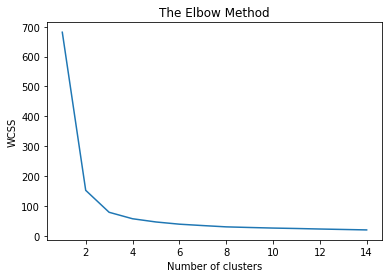

In [36]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_jobs = -1, 
                    random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [37]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [38]:
iris_df = pd.concat([iris_df,
                     pd.DataFrame(y_kmeans, columns=['Clusters'])], 
                    axis=1)

In [39]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Clusters
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [11]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv', index_col=0)

In [12]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [13]:
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [14]:
X = dataset.iloc[:, [2, 3]].values

Text(0,0.5,'WCSS')

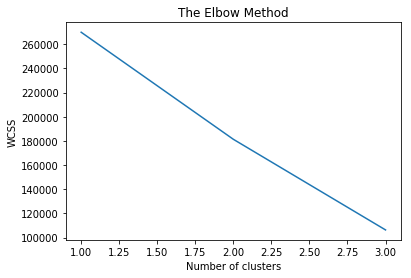

In [29]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 4):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_jobs = -1, 
                    random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 4), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [17]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', 
                random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [18]:
kmeans.n_iter_

3

In [19]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [20]:
np.unique(y_kmeans)

array([0, 1, 2, 3, 4], dtype=int32)

In [21]:
cluster_df = pd.concat([pd.DataFrame(dataset.iloc[:,:].values, columns=dataset.columns),
                        pd.DataFrame(y_kmeans, columns=['Clusters'])], 
                       axis=1)

In [22]:
cluster_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


In [28]:
for k,v in cluster_df.groupby('Clusters'):
    print('Cluster: ',k)
    print(v.head())

Cluster:  0
    Gender Age Annual Income (k$) Spending Score (1-100)  Clusters
43  Female  31                 39                     61         0
46  Female  50                 40                     55         0
47  Female  27                 40                     47         0
48  Female  29                 40                     42         0
49  Female  31                 40                     42         0
Cluster:  1
     Gender Age Annual Income (k$) Spending Score (1-100)  Clusters
124  Female  23                 70                     29         1
128    Male  59                 71                     11         1
130    Male  47                 71                      9         1
134    Male  20                 73                      5         1
136  Female  44                 73                      7         1
Cluster:  2
   Gender Age Annual Income (k$) Spending Score (1-100)  Clusters
0    Male  19                 15                     39         2
2  Female  20         

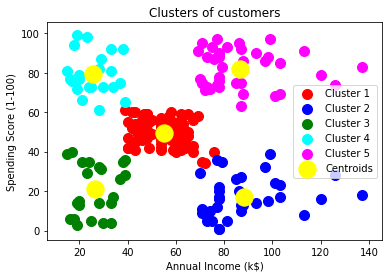

In [14]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [18]:
y = []
for i in range(len(y_kmeans)):
    if(y_kmeans[i] == 3 or y_kmeans[i] == 4):
        y.append(1)
    else:
        y.append(0)

In [19]:
y = np.array(y)

## Hierarchical Clustering

Text(0,0.5,'Euclidean distances')

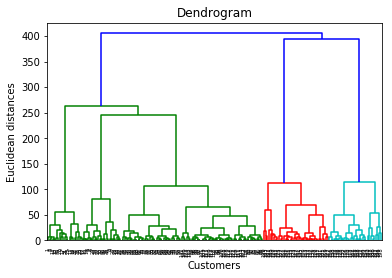

In [12]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

In [20]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, 
                             affinity = 'euclidean', 
                             linkage = 'ward')
y_hc = hc.fit_predict(X)

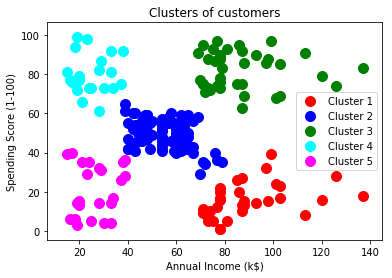

In [21]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
